24/08/08 20:58:11 WARN Utils: Your hostname, MacBook-Pro-cua-Le-2.local resolves to a loopback address: 127.0.0.1; using 192.168.0.118 instead (on interface en0)
24/08/08 20:58:11 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/08/08 20:58:11 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/08/08 20:58:12 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
24/08/08 20:58:12 WARN Utils: Service 'SparkUI' could not bind on port 4041. Attempting port 4042.


Dữ liệu ban đầu:
   day  month               timeStamp  year  \
0   15      7 2024-07-15 23:56:43.918  2024   
1   15      7 2024-07-15 23:56:48.920  2024   
2   15      7 2024-07-15 23:56:53.939  2024   
3   15      7 2024-07-15 23:56:58.923  2024   
4   15      7 2024-07-15 23:57:03.971  2024   

   payload_Zone1_humidity_mt0708_dew_value  \
0                                 85.03775   
1                                 84.97577   
2                                 84.91971   
3                                 84.95148   
4                                 84.97528   

   payload_Zone1_humidity_mt0708_pid_out_htr  
0                                  24.221770  
1                                  23.322676  
2                                  25.734009  
3                                  24.551308  
4                                  24.550676  


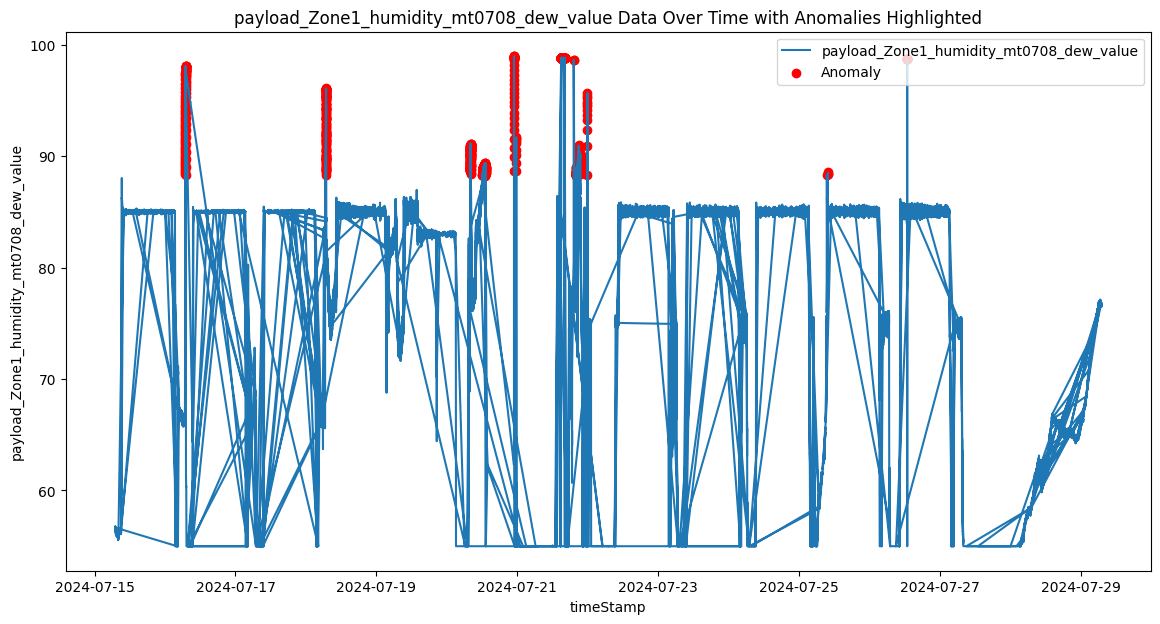

24/08/08 20:58:24 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from pyspark.sql import SparkSession

# Tạo Spark session
spark = SparkSession.builder.appName("AnomalyDetection").getOrCreate()

# Đọc file CSV bằng Spark
file_path = "../../../data/zone_temparature_and_humidity.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Chuyển đổi DataFrame của Spark thành Pandas DataFrame
pandas_df = df.toPandas()
column_timestamp= "timeStamp"
# Hiển thị dữ liệu ban đầu
print("Dữ liệu ban đầu:")
print(pandas_df.head())

# Chọn đặc trưng cụ thể để phân tích
feature = 'payload_Zone1_humidity_mt0708_dew_value'
data_feature = pandas_df[feature].dropna().values.reshape(-1, 1)

# Áp dụng phương pháp Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(data_feature)
anomaly_indices = np.where(anomalies == -1)[0]

# Vẽ biểu đồ dữ liệu với các điểm bất thường được đánh dấu
plt.figure(figsize=(14, 7))
plt.plot(pandas_df[column_timestamp], pandas_df[feature], label=feature)
plt.scatter(pandas_df.iloc[anomaly_indices][column_timestamp], pandas_df.iloc[anomaly_indices][feature], color='red', label='Anomaly')
plt.xlabel(column_timestamp)
plt.ylabel(feature)
plt.title(f'{feature} Data Over Time with Anomalies Highlighted')
plt.legend()
plt.show()
